# Project Cover Word Cloud

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [11]:
path = r'../models/train/topicKeys.txt'

df_topics = (pd.read_table(path, 
                           header=None, 
                           index_col=None, 
                           names = ['topic', 'weight', 'keywords'],
                           encoding='utf8')
             .sort_values(by='topic')
             .reset_index(drop=True))

text = df_topics.keywords.values.tolist()
text = ' '.join(text)
print(text[:1000])

theatre tonight exhibition universal approved adults censor recommended comedy tomorrow night plans dance george dancing box telephone picture story friday  day people procession mayor city crowd town large governor reception band morning great afternoon excellency visit public streets number demonstration  election electors candidate candidates vote poll district votes elections returning elected officer council seat electoral member number nomination gentlemen nominated  oamaru aro thames dunedin north otago street waitaki john zealand town timaru kurow fleming good tyne sumpter hold george kakanui  christchurch timaru ashburton street canterbury akaroa lyttelton east road south john colombo bay temuka thomas burnett kaiapoi north notices west  association press received telegraph copyright london united electric july cable sydney august june april march australian news september october january  price lid yard sale ladies white prices pair silk special black usual wide worth navy bl

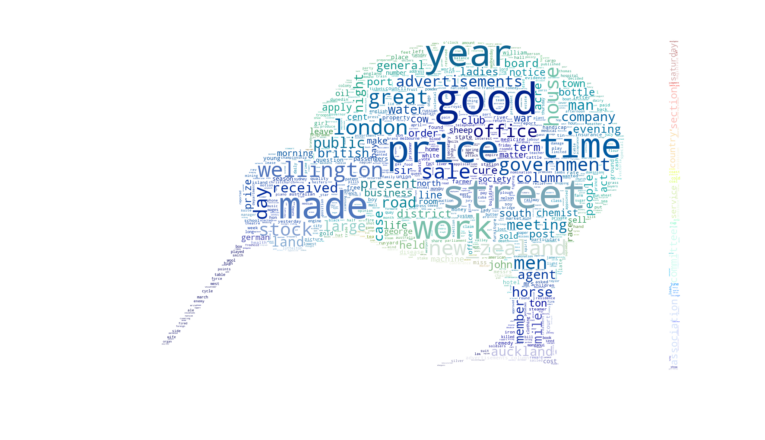

In [30]:
#https://researchprofile.canterbury.ac.nz/Project.aspx?projectid=272
mask = np.array(Image.open('./kiwi.png'))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=100, random_state=1)
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[13,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('./cover.png')
plt.show()

---